# Async Python

## A briefing on asynchronous python coding, essential in Agent engineering

Here is a masterful tutorial by you-know-who with exercises and comparisons.

https://chatgpt.com/share/680648b1-b0a0-8012-8449-4f90b540886c

This includes how to run async code from a python module.



#### resources:
- ep 27 of the course

# How `asyncio` Works in Python

## 1. Definition
- `asyncio` is a Python library for writing **concurrent code** without threads or processes.  
- It uses a **single-threaded event loop** that switches between tasks **whenever one is waiting**. it can only execute only one coroutine at a time.
- If a coroutine reaches a point where it needs to stop and wait—such as waiting for I/O or making a call to OpenAI and waiting for a response—the event loop pauses this coroutine and switches to running another coroutine.
- It provides a lightweight alternative to multithreading or multiprocessing.
- Unlike threads or processes, it doesn’t run things in parallel at the OS level (when you can dedicate each cpu core to one task)—it uses a single-threaded event loop to switch between tasks.
- it is multi-threading at code level.
- asyncio is very useful for I/O bound operation

---

## 2. I/O-bound operations
- An **I/O-bound operation** is a task whose speed is limited by input/output (I/O) rather than the CPU. <br>
The program spends most of its time waiting for data to be transferred instead of processing (doing calculations)., 

such as:
  - 🌐 Waiting for an API response  
  - 💾 Reading/writing files  
  - 🗄️ Database queries  
- Since the CPU is mostly idle during this time, `asyncio` can let other tasks run instead of blocking.

---

## 3. Key concepts
- `async def` → defines a **coroutine** (a function that can be paused/resumed).  
- `await` → add a coroutine to the event loop. it pauses the coroutine until the awaited task is finished, giving control back to the event loop.  
- **Event loop** → the core scheduler that runs coroutines, switching between them efficiently.

---

## 4. Concur

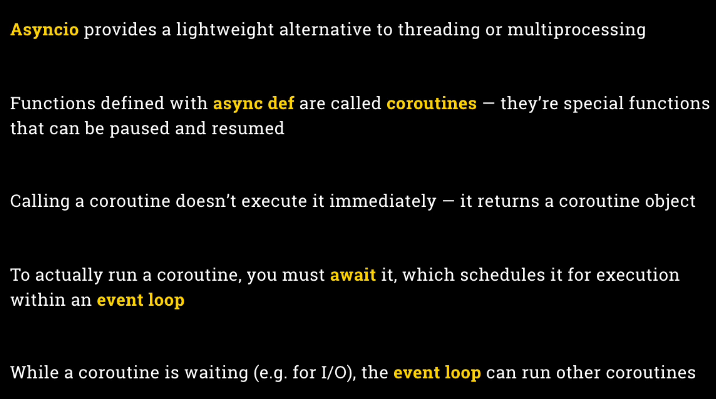

### And now some examples:

In [1]:
# you create a coroutine with return and await it when you call it. then it run the coroutine object.

async def print_my_name(name):
    return f"My name is {name}"

print(await print_my_name("Alice"))
print(await print_my_name("Bob"))


My name is Alice
My name is Bob


In [1]:
# Let's define an async function

import asyncio

async def do_some_work():
    print("Starting work")
    await asyncio.sleep(1)
    print("Work complete")


In [2]:
# What will this do?

do_some_work()

<coroutine object do_some_work at 0x74510c455d80>

In [3]:
# OK let's try that again!

await do_some_work()

Starting work
Work complete


In [4]:
# What's wrong with this?

async def do_a_lot_of_work():
    do_some_work()
    do_some_work()
    do_some_work()

await do_a_lot_of_work()

/tmp/ipykernel_37040/1833959015.py:4: RuntimeWarning: coroutine 'do_some_work' was never awaited
  do_some_work()
/tmp/ipykernel_37040/1833959015.py:5: RuntimeWarning: coroutine 'do_some_work' was never awaited
  do_some_work()
/tmp/ipykernel_37040/1833959015.py:6: RuntimeWarning: coroutine 'do_some_work' was never awaited
  do_some_work()


In [5]:
# Interesting warning! Let's fix it

async def do_a_lot_of_work():
    await do_some_work()
    await do_some_work()
    await do_some_work()

await do_a_lot_of_work()

Starting work
Work complete
Starting work
Work complete
Starting work
Work complete


In [ ]:
# And now let's do it in parallel, add these coroutines to the 
# It's important to recognize that this is not "multi-threading" in the way that you may be used to
# The asyncio library is running on a single thread, but it's using a loop to switch between tasks while one is waiting

results = await asyncio.gather(
    do_some_work(),
    do_some_work(),
    do_some_work(),
)

Starting work
Starting work
Starting work
Work complete
Work complete
Work complete


### Finally - try writing a python module that calls do_a_lot_of_work_in_parallel

See the link at the top; you'll need something like this in your module:

```python
if __name__ == "__main__":
    asyncio.run(do_a_lot_of_work_in_parallel())
```